# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 9303 Скворчевский Богдан и Павлов Дмитрий. Вариант №10

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный прямоугольный импульс: 
$$
s(k) = \begin{equation*}
\begin{cases}
   U, n_0 \leq k \leq n_0 + n_{imp} - 1\\
   0, иначе
 \end{cases}
\end{equation*}
$$

Линейная комбинация дискретных гармонических сигналов: $s(k) = a_1x_1(k) + a_2 x_2 (k) + a_3 x_3 (k)$, где $x_i(k) = B_i\sin(\hat\omega_i k)$, $i = 1,2,3$

Дискретный гармонический сигнал $s(k)$: $s(k) = C\cos(\hat\omega_0 k)$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинаций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

1. Смоделировать дискретный прямоугольный импульс:

$$
s_1(k) = \begin{equation*}
\begin{cases}
   U, n_0 \leq k \leq n_0 + n_{imp} - 1\\
   0, иначе
 \end{cases}
\end{equation*}
$$

на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0,N-1]$. Пояснить как выполняется моделирование импульса.

2. Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

$s_2(k) = a_1x_1(k) + a_2 x_2 (k) + a_3 x_3 (k)$, где $x_i(k) = B_i\sin(\hat\omega_i k)$, $i = 1,2,3$ 

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N - 1]$. Вычислить среднее значение (идентификатор `mean_s2`), энергию (идентификатор `Е`) и среднюю мощность последовательности $s_2(k)$ (идентификатор `Р`). Пояснить:

  * операции при моделировании линейной комбинации сигналов $s_2(k)$
  * как определяют указанные характеристики.

3. Вывести график дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал $s(k)$: $s(k) = C\cos(\hat\omega_0 k)$ с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N-1]$. Привести  аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

4. Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

5. Сделать выводы.

## Выполнение работы

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math

class Config:
    def __init__(self, variant):
        self.Nb = variant
        self.N = 30 + self.Nb % 5
        self.a = (-1) ** self.Nb * (0.8 + 0.005 * self.Nb)
        self.C = 1 + self.Nb % 5
        self.omega = math.pi / (6 + self.Nb % 5)
        self.U = self.Nb
        self.n0 = 3 + self.Nb % 5
        self.Nimp = 5 + self.Nb % 5
        self.B1 = 1.5 + self.Nb % 5
        self.B2 = 5.7 - self.Nb % 5
        self.B3 = 2.2 + self.Nb % 5
        self.omega1 = math.pi / (4 + self.Nb % 5)
        self.omega2 = math.pi / (8 + self.Nb % 5)
        self.omega3 = math.pi / (16 + self.Nb % 5)
        self.a1 = 1.5 - self.Nb % 5
        self.a2 = 0.7 + self.Nb % 5
        self.a3 = 1.4 + self.Nb % 5

    def x(self, it, k):
        assert it in [1, 2, 3]
        return self.__getattribute__(f'B{it}') * np.sin(self.__getattribute__(f'omega{it}') * k)


config = Config(10)

Пункт 1.
Смоделировать дискретный прямоугольный импульс:
$$s_1 =
\begin{cases}
    \displaystyle U,        & \quad n_0 \leq k \leq n_0 + n_{imp} - 1\\
    0  & \quad \text{иначе}
  \end{cases}$$
на основе дискретного единичного скачка $\delta_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, N-1]$ Пояснить как выполняется моделирование импульса.

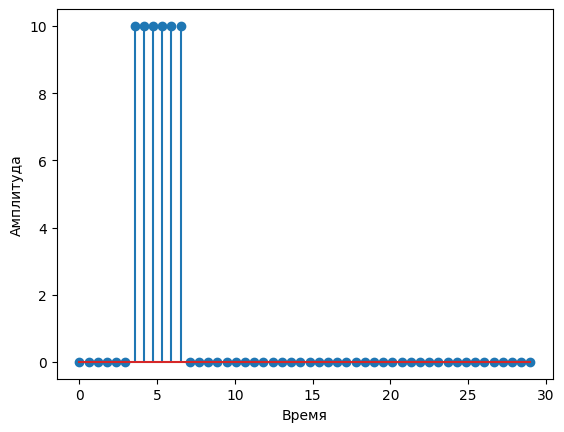

In [46]:
def s1(k):
    return config.U * int(k >= 0) if config.n0 <= k <= config.n0 + config.Nimp - 1 else 0

n = np.linspace(0, config.N - 1)

plt.stem(n, np.array([s1(k) for k in n]))
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.show()

Пояснить как выполняется моделирование импульса:

В соответствии с интервалом времени генерируется массив из нулей. Каждому элементу, подпадающему под условие, присваивается U.

Пункт 2.
Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k):$
$$s_2(k) = a_1x_1(k) + a_2x_2(k) + a_3x_3(k)$$, где
$$x_i(k) = B_isin(\hat{\omega_ik}), i=1,2,3$$
с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N -1]$.
Вычислить среднее значение (идентификатор mean_s2), энергию (идентификатор E) и среднюю мощность последовательности $s_2(k)$ (идентификатор P). Пояснить:
a. операции при моделировании линейной комбинации сигналов $s_2(k)$
b. как определяют указанные характеристики.

In [47]:
k = np.linspace(0, 5 * config.N-1, 5 * config.N)

def s2(k):
    return config.a1 * config.x(1, k) + config.a2 * config.x(2, k) + config.a3 * config.x(3, k)

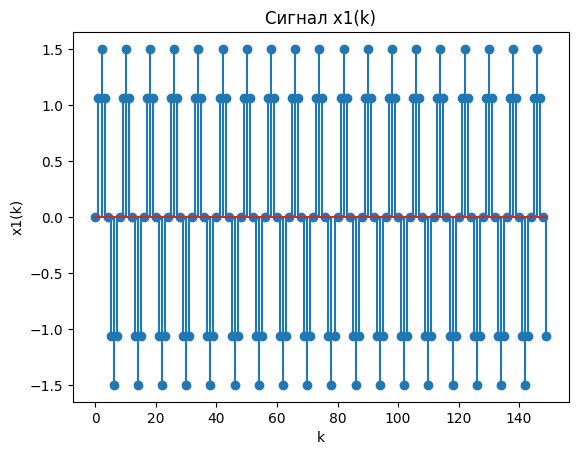

In [48]:
plt.stem(k, config.x(1, k))
plt.xlabel("k")
plt.ylabel("x1(k)")
plt.title("Сигнал x1(k)")
plt.show()

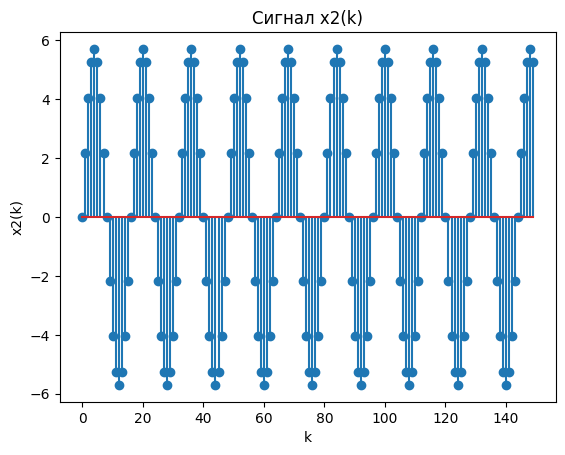

In [49]:
plt.stem(k, config.x(2, k))
plt.xlabel("k")
plt.ylabel("x2(k)")
plt.title("Сигнал x2(k)")
plt.show()

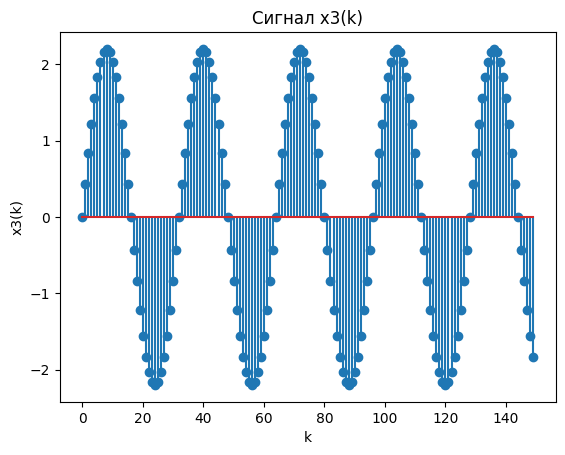

In [50]:
plt.stem(k, config.x(3, k))
plt.xlabel("k")
plt.ylabel("x3(k)")
plt.title("Сигнал x3(k)")
plt.show()

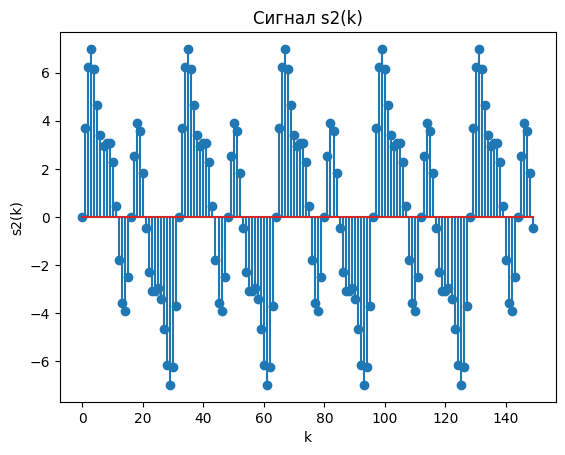

In [51]:
plt.stem(k, s2(k))
plt.xlabel("k")
plt.ylabel("s2(k)")
plt.title("Сигнал s2(k)")
plt.show()

In [52]:
print(f"Среднее значение s2: {np.mean(s2(k))}")
print(f"Энергия: {np.sum(s2(k) ** 2)}")
print(f"Средняя энергия последовательности: {np.sum(s2(k) ** 2) / len(k)}")

Среднее значение s2: 0.28396041266583466
Энергия: 2231.4741570344095
Средняя энергия последовательности: 14.876494380229396


Итоговый сигнал $s2(k)$ является суммой гармонических сигналов $x_i$, при этом каждый из них домножается на свою константу

Определение указаных характеристик
Среднее значение:
$$ means2 = \frac{\sum_{k=0}^{N-1} s_2(k)}{N} $$
Энергия:
$$E = \sum_{k=0}^{N-1}|s_2(k)|^2$$
Средняя мощность:
$$P = \frac{E}{T}$$

Пункт 3.
Вывести график дискретного сигнала $s_3(k)$ представляющего собой дискретный гармонический сигнал $s(k)$
$$s(k) = Ccos(\hat{\omega_0}k)$$ с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N - 1]$.
Привести аналитическую формулу дискретного сигнала $s_3(k)$ и пояснить операции при его моделировании.

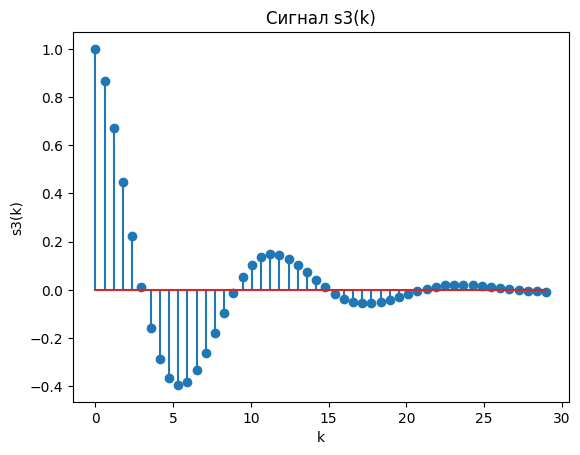

In [53]:
k = np.linspace(0, config.N-1)

s3 = lambda x: np.abs(config.a) ** x * config.C * np.cos(config.omega * x)

plt.stem(k, s3(k))
plt.xlabel("k")
plt.ylabel("s3(k)")
plt.title("Сигнал s3(k)")
plt.show()

Пункт 4.
Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.

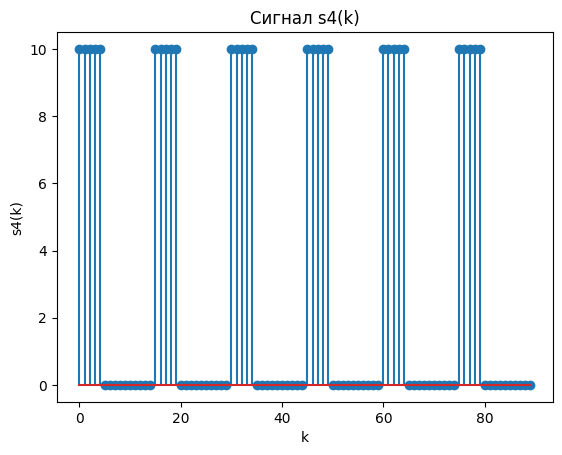

In [54]:
def s4(k):
    return config.U * int(k >= 0) if k % (config.Nimp * 3) < config.Nimp else 0

k = np.linspace(0, 3 * config.N - 1, 3 * config.N)

plt.stem(k, [s4(i) for i in k])
plt.xlabel("k")
plt.ylabel("s4(k)")
plt.title("Сигнал s4(k)")
plt.show()

### Выводы

В ходе выполнения лабораторной работы было изучено математическое описание линейных комбинаций дискретных гармонических сигналов, смоделированы на практике дискретный прямоугольный импульс, линейная комбинация дискретных гармонических сигналов, дискретный сигнал, представляющий собой дискретный гармонический сигнал с экспоненциальной огибающей, периодическая последовательность дискретных прямоугольных импульсов.